In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, Polygon


In [2]:
a_file = 'Resources/CleanAirbnbData.csv'                     #air bnb datafile
h_file = 'Resources/Housing_New_York_Units_by_Building.csv'  #housing datafile

df_a = pd.read_csv(a_file)  # air bnb dataframe
df_h = pd.read_csv(h_file)  # house buildings dataframe
df_h = df_h[df_h['Building Completion Date'].notnull()]
df_h['Building Completion Date'] = pd.to_datetime(df_h['Building Completion Date'])

#other data population population/land area
o_data = {'borough':['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
         'population':[1432132,2582830,1628701,2278906,476179],
         'area':[110,180,59,280, 152]}

df_o = pd.DataFrame(o_data)  #other details dataframe
df_o = df_o.set_index('borough')
df_o['population_pct'] = (df_o['population']/df_o['population'].sum()) * 100
df_o['area_pct'] = (df_o['area']/df_o['area'].sum()) * 100
df_o.head()

,population,area,population_pct,area_pct
borough,,,,
Bronx,1432132,110,17.051732,14.084507
Brooklyn,2582830,180,30.752560,23.047375
Manhattan,1628701,59,19.392188,7.554417
Queens,2278906,280,27.133878,35.851472
Staten Island,476179,152,5.669643,19.462228


In [3]:
df_a.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
df_h.dtypes

Project ID                                     int64
Project Name                                  object
Project Start Date                            object
Project Completion Date                       object
Building ID                                  float64
Number                                        object
Street                                        object
Borough                                       object
Postcode                                     float64
BBL                                          float64
BIN                                          float64
Community Board                               object
Council District                             float64
Census Tract                                 float64
NTA - Neighborhood Tabulation Area            object
Latitude                                     float64
Longitude                                    float64
Latitude (Internal)                          float64
Longitude (Internal)                         f

In [5]:
gp_a = df_a.groupby(['Neighbourhood Group'])
gp_h = df_h.groupby(['Borough'])
gp_h_yr = df_h.groupby(df_h['Borough'])

In [6]:
df_gp_a = pd.DataFrame({'listing_cnt':gp_a['Neighbourhood Group'].count(),
                             'listing_pct' : (gp_a['Neighbourhood Group'].count()/df_a['Neighbourhood Group'].count()) * 100 })
df_gp_a.index.name = 'borough'

In [7]:
# Listings
df_gp_a

,listing_cnt,listing_pct
borough,,
Bronx,914,2.914355
Brooklyn,12260,39.091895
Manhattan,13559,43.233850
Queens,4298,13.704483
Staten Island,331,1.055417


In [8]:
# House Building Projects
df_gp_h = pd.DataFrame({'bldg_cnt':gp_h['Borough'].count(),
                             'bldg_pct': (gp_h['Borough'].count()/df_h['Borough'].count()) * 100,
                              'unit_cnt': gp_h['All Counted Units'].sum(),
                              'unit_pct' : (gp_h['All Counted Units'].sum()/df_h['All Counted Units'].sum()) * 100,
                              'unit_rental_cnt': gp_h['Counted Rental Units'].sum(),
                              'unit_rental_pct' : (gp_h['Counted Rental Units'].sum()/df_h['Counted Rental Units'].sum()) * 100,
                               'unit_own_cnt': gp_h['Counted Homeownership Units'].sum(),
                              'unit_own_pct' : (gp_h['Counted Homeownership Units'].sum()/df_h['Counted Homeownership Units'].sum()) * 100})
df_gp_h.index.name = 'borough'

df_gp_h.head()

,bldg_cnt,bldg_pct,unit_cnt,unit_pct,unit_rental_cnt,unit_rental_pct,unit_own_cnt,unit_own_pct
borough,,,,,,,,
Bronx,718,23.236246,23972,29.037260,22352,31.090649,1620,15.192722
Brooklyn,1224,39.611650,24064,29.148699,21274,29.591198,2790,26.165244
Manhattan,557,18.025890,26352,31.920151,21673,30.146189,4679,43.880709
Queens,382,12.362460,6025,7.298076,4718,6.562530,1307,12.257338
Staten Island,209,6.763754,2143,2.595814,1876,2.609433,267,2.503986


In [9]:
df_gp_h

,bldg_cnt,bldg_pct,unit_cnt,unit_pct,unit_rental_cnt,unit_rental_pct,unit_own_cnt,unit_own_pct
borough,,,,,,,,
Bronx,718,23.236246,23972,29.037260,22352,31.090649,1620,15.192722
Brooklyn,1224,39.611650,24064,29.148699,21274,29.591198,2790,26.165244
Manhattan,557,18.025890,26352,31.920151,21673,30.146189,4679,43.880709
Queens,382,12.362460,6025,7.298076,4718,6.562530,1307,12.257338
Staten Island,209,6.763754,2143,2.595814,1876,2.609433,267,2.503986


In [10]:
df_all = df_o.join(df_gp_a, how = 'left').join(df_gp_h, how = 'left')

In [11]:
df_all

,population,area,population_pct,area_pct,listing_cnt,listing_pct,bldg_cnt,bldg_pct,unit_cnt,unit_pct,unit_rental_cnt,unit_rental_pct,unit_own_cnt,unit_own_pct
borough,,,,,,,,,,,,,,
Bronx,1432132,110,17.051732,14.084507,914,2.914355,718,23.236246,23972,29.037260,22352,31.090649,1620,15.192722
Brooklyn,2582830,180,30.752560,23.047375,12260,39.091895,1224,39.611650,24064,29.148699,21274,29.591198,2790,26.165244
Manhattan,1628701,59,19.392188,7.554417,13559,43.233850,557,18.025890,26352,31.920151,21673,30.146189,4679,43.880709
Queens,2278906,280,27.133878,35.851472,4298,13.704483,382,12.362460,6025,7.298076,4718,6.562530,1307,12.257338
Staten Island,476179,152,5.669643,19.462228,331,1.055417,209,6.763754,2143,2.595814,1876,2.609433,267,2.503986


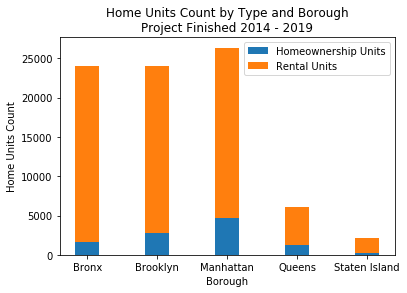

In [13]:
#show bar graph of house units  
fig, ax =  plt.subplots()

ind = np.arange(5)
width = 0.35 

p1 = ax.bar(df_all.index, df_all.unit_own_cnt , width)
p2 = ax.bar(df_all.index, df_all.unit_rental_cnt , width, bottom = df_all.unit_own_cnt )

plt.ylabel('Home Units Count')
plt.xlabel('Borough')
plt.title('Home Units Count by Type and Borough\nProject Finished 2014 - 2019')
plt.legend((p1[0], p2[0]), ('Homeownership Units', 'Rental Units'))
plt.yticks(np.arange(0, 30000, 5000))

fig.savefig('Output/NYC_HomeUnitsCount.png')
plt.show()


In [13]:
df_all[['unit_own_cnt', 'unit_rental_cnt']]

,unit_own_cnt,unit_rental_cnt
borough,,
Bronx,1620,22352
Brooklyn,2790,21274
Manhattan,4679,21673
Queens,1307,4718
Staten Island,267,1876


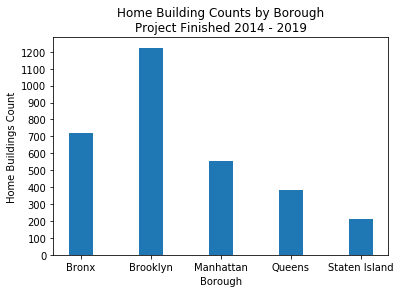

In [14]:
#show bar graph of house buildings projects
fig, ax =  plt.subplots()

ind = np.arange(5)
width = 0.35 

p1 = ax.bar(df_all.index, df_all.bldg_cnt , width)
    
plt.ylabel('Home Buildings Count')
plt.xlabel('Borough')
plt.title('Home Building Counts by Borough\nProject Finished 2014 - 2019')
plt.yticks(np.arange(0, 1300, 100))
fig.savefig('Output/NYC_BuildingCounts.png')
plt.show()

In [15]:
df_all[['bldg_cnt']]

,bldg_cnt
borough,
Bronx,718
Brooklyn,1224
Manhattan,557
Queens,382
Staten Island,209


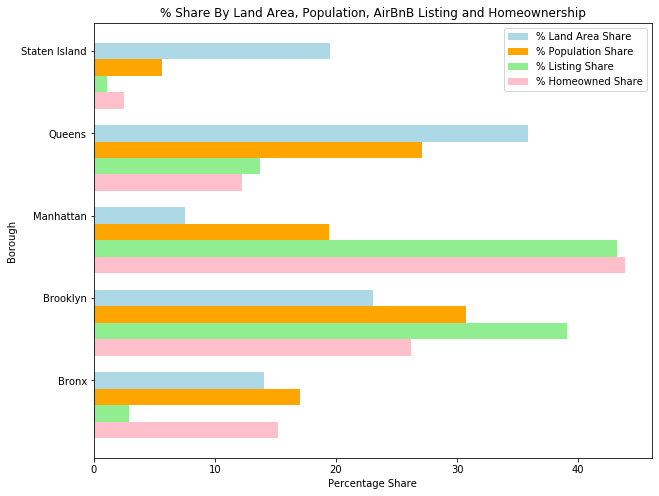

In [15]:
# Show Distribution of area/population/listing/home ownership cnt
fig, ax =  plt.subplots(figsize=(10,8))

width = 0.20 
y_pos = np.arange(len(df_all.index))

p1 = ax.barh(y_pos, df_all.area_pct , width, color='lightblue')
p2 = ax.barh(y_pos - width , df_all.population_pct , width , color='orange')
p3 = ax.barh(y_pos - (width * 2) , df_all.listing_pct , width , color='lightgreen')
p4 = ax.barh(y_pos - (width * 3) , df_all.unit_own_pct , width , color='pink')

ax.set_yticks(y_pos)
ax.set_yticklabels(df_all.index)
plt.ylabel('Borough')
plt.xlabel('Percentage Share')
plt.title('% Share By Land Area, Population, AirBnB Listing and Homeownership')
plt.legend((p1[0], p2[0], p3[0], p4[0]), ('% Land Area Share', '% Population Share','% Listing Share','% Homeowned Share'))
fig.savefig('Output/NYC_PctShareByCategories.png')
plt.show()